# PROJECT 3A_RTS: Big data analysis of an electricity power consumption (Tetouan Town - Morocco) and visualizing Prediction results

## 1) Import useful libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## 2) Retrieve the dataset

In [2]:
consumptionTetuan=pd.read_csv("Tetuan City power consumption.csv")

In [3]:
zone1 = consumptionTetuan['Zone 1 Power Consumption']
zone2 = consumptionTetuan['Zone 2  Power Consumption'] 
zone3 = consumptionTetuan['Zone 3  Power Consumption']

## 3) Model of linear regression

0.1744721974338056


Text(0.5, 1.0, 'Consumption of zone 1 according to the temperature')

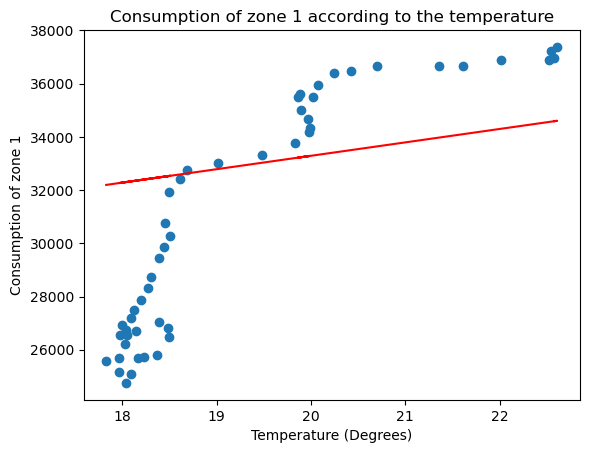

In [4]:
model1 = LinearRegression()
X = consumptionTetuan['Temperature'].to_numpy().reshape(len(consumptionTetuan), 1)
y = consumptionTetuan['Zone 1 Power Consumption'].to_numpy().reshape(len(consumptionTetuan), 1)

# split the dataset in train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=False)

# Training of the model
model1.fit(X_train,y_train)

# Score of the model learning
print(model1.score(X_train, y_train)) # R^2

# Predictions of the model for the test set
predictions = model1.predict(X_test)

# Plot the results
plt.scatter(X_test[0:50], y_test[0:50])
plt.plot(X_test[0:50], predictions[0:50], c='r')
plt.xlabel("Temperature (Degrees)")
plt.ylabel("Consumption of zone 1")
plt.title("Consumption of zone 1 according to the temperature")

In [5]:
print("R² =", model1.score(X_test, y_test)) # R^2

print("MAE =", mean_absolute_error(y_test, predictions))

R² = 0.05738713274780294
MAE = 5059.356658903726


0.1457302089517547


Text(0.5, 1.0, 'Consumption of zone 2 according to the temperature')

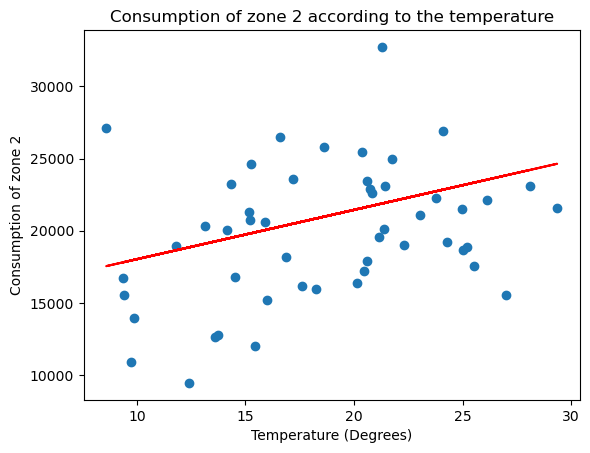

In [6]:
model2 = LinearRegression()
X = consumptionTetuan['Temperature'].to_numpy().reshape(len(consumptionTetuan), 1)
y = zone2.to_numpy().reshape(len(consumptionTetuan), 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model2.fit(X_train,y_train)
print(model2.score(X_train, y_train)) # R^2
predictions = model2.predict(X_test)

plt.scatter(X_test[0:50], y_test[0:50])
plt.plot(X_test[0:50], predictions[0:50], c='r')
plt.xlabel("Temperature (Degrees)")
plt.ylabel("Consumption of zone 2")
plt.title("Consumption of zone 2 according to the temperature")

In [7]:
print("R²=", model2.score(X_test, y_test)) # R^2

print("MAE=", mean_absolute_error(y_test, predictions))

R²= 0.1483306205094309
MAE= 3850.83976025941


0.23927439491078595


Text(0.5, 1.0, 'Consumption of zone 3 according to the temperature')

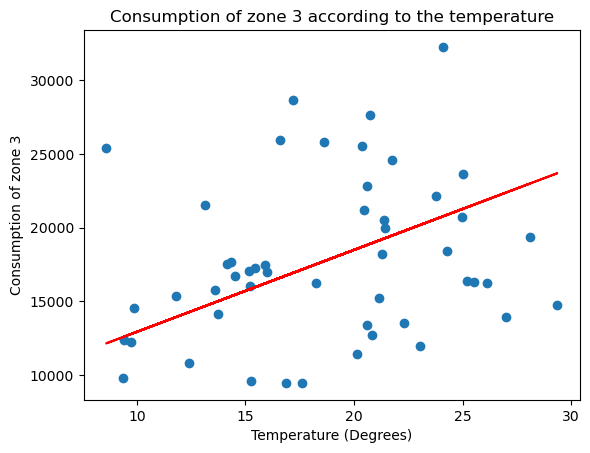

In [8]:
model3 = LinearRegression()
X = consumptionTetuan['Temperature'].to_numpy().reshape(len(consumptionTetuan), 1)
y = zone3.to_numpy().reshape(len(consumptionTetuan), 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model3.fit(X_train,y_train)
print(model3.score(X_train, y_train)) # R^2
predictions = model3.predict(X_test)

plt.scatter(X_test[0:50], y_test[0:50])
plt.plot(X_test[0:50], predictions[0:50], c='r')
plt.xlabel("Temperature (Degrees)")
plt.ylabel("Consumption of zone 3")
plt.title("Consumption of zone 3 according to the temperature")

In [9]:
print("R² =", model3.score(X_test, y_test)) # R^2

print("MAE =",mean_absolute_error(y_test, predictions))

R² = 0.24103163245183223
MAE = 4519.074899768149


## 4) Multi-linear regression

In [10]:
model_multi = LinearRegression()
X = consumptionTetuan[['Temperature', 'Humidity', 'Wind Speed']].to_numpy().reshape(len(consumptionTetuan), 3)
y = consumptionTetuan['Zone 1 Power Consumption'].to_numpy().reshape(len(consumptionTetuan), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model_multi.fit(X_train,y_train)

predictions = model_multi.predict(X_test)

In [11]:
print("R² = ", model_multi.score(X_test, y_test))

print("MAE = ", mean_absolute_error(y_test, predictions))

R² =  0.20823184255129823
MAE =  5195.963050332891


## 5) After the processing of data (extraction of hours)

In [12]:
# avec heure
consumptionTetuan['DateTime']=pd.to_datetime(consumptionTetuan['DateTime']) 
def conv(data):
    data['month']=data['DateTime'].dt.month
    data['day']=data['DateTime'].dt.day
    data['hour']=data['DateTime'].dt.hour    
    return data

consumptionTetuan = conv(consumptionTetuan)

In [13]:
modelHours = LinearRegression()
X = consumptionTetuan[['Temperature', 'hour']].to_numpy().reshape(len(consumptionTetuan), 2)
y = consumptionTetuan['Zone 1 Power Consumption'].to_numpy().reshape(len(consumptionTetuan), 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
modelHours.fit(X_train,y_train)

predictions = modelHours.predict(X_test)

In [14]:
print(mean_absolute_error(y_test, predictions))

3457.716828145216
